自定义字典对于效果分词的一个

有勇气的牛排

编程领域

博主

In [1]:
import jieba

text = "有勇气的牛排是一个编程领域博主的名字"

print("默认分词结果：")
print(jieba.lcut(text))

print("\n加载自定义词典后：")

# 加载自定义词典
jieba.load_userdict(r"source\jieba\custom_dict.txt")

print(jieba.lcut(text))

c:\Users\xytcs\Desktop\uv python\ds_learn\.venv\Lib\site-packages\jieba\_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xytcs\AppData\Local\Temp\jieba.cache


默认分词结果：


Loading model cost 0.638 seconds.
Prefix dict has been built successfully.


['有', '勇气', '的', '牛排', '是', '一个', '编程', '领域', '博主', '的', '名字']

加载自定义词典后：
['有勇气的牛排', '是', '一个', '编程领域', '博主', '的', '名字']


In [3]:
import jieba

text = "影视飓风的Tim, 计划要优化大模型推理的延迟，提升Prompt工程的效果"

print("原始分词：")
print(jieba.lcut(text))

# 动态添加词汇
jieba.add_word("影视飓风")
jieba.add_word("Prompt工程")

print("\n添加词汇后：")
print(jieba.lcut(text))

原始分词：
['影视', '飓风', '的', 'Tim', ',', ' ', '计划', '要', '优化', '大模型推理', '的', '延迟', '，', '提升', 'Prompt工程', '的', '效果']

添加词汇后：
['影视飓风', '的', 'Tim', ',', ' ', '计划', '要', '优化', '大模型推理', '的', '延迟', '，', '提升', 'Prompt工程', '的', '效果']


在 `jieba` 分词中有这么一个专门的模块 `jieba.analyse`，用于进行文本关键词提取和文本分析。主要是通过一些模型算法来进行关键词提取，而不是简单词频之类的


常见的就是 **TF-IDF 关键词提取**

In [2]:
import jieba.analyse as analyse

def extract_keywords_tfidf(text, topK=20, withWeight=False, allowPOS=()):
    """
    使用TF-IDF算法提取关键词
    
    参数:
    text: 待分析文本
    topK: 返回关键词数量
    withWeight: 是否返回权重
    allowPOS: 允许的词性列表
    
    返回:
    关键词列表（带权重或不带权重）
    """
    keywords = analyse.extract_tags(text, topK=topK, withWeight=withWeight, allowPOS=allowPOS)
    return keywords

def extract_keywords_textrank(text, topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v')):
    """
    使用TextRank算法提取关键词
    
    参数:
    text: 待分析文本
    topK: 返回关键词数量
    withWeight: 是否返回权重
    allowPOS: 允许的词性列表
    
    返回:
    关键词列表
    """
    keywords = analyse.textrank(text, topK=topK, withWeight=withWeight, allowPOS=allowPOS)
    return keywords

text = "机器学习是人工智能的核心领域，它使计算机系统能够从数据中学习并改进。深度学习是机器学习的一个子领域。"

keywords = extract_keywords_tfidf(text, topK=5, withWeight=True)
print("TF-IDF关键词:", keywords)

keywords_tr = extract_keywords_textrank(text, topK=5, withWeight=True)
print("TextRank关键词:", keywords_tr)



TF-IDF关键词: [('学习', 1.4442799542275), ('机器', 0.830195190485), ('领域', 0.67653694280125), ('人工智能', 0.591126649718125), ('计算机系统', 0.569574119324375)]
TextRank关键词: [('学习', 1.0), ('机器', 0.3383655482959736), ('深度', 0.33675281282292807), ('领域', 0.31409373401079593), ('数据', 0.3122225007683507)]


核工业相关新闻片段分词

In [28]:
import re

import jieba
import jieba.analyse
import jieba.posseg as pseg  # 词性标注模块
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = """
核反应堆是核电站的核心设备，其安全运行直接关系到公众健康。
铀浓缩技术是核燃料生产的关键，需严格控制浓度以避免核扩散。
数字化监测系统提升了核设施的运行可靠性，保障核电安全。
"""

# 数据预处理

text = re.sub(r"\s+", " ", text)
print(text)

 核反应堆是核电站的核心设备，其安全运行直接关系到公众健康。 铀浓缩技术是核燃料生产的关键，需严格控制浓度以避免核扩散。 数字化监测系统提升了核设施的运行可靠性，保障核电安全。 


基础分词

In [29]:
# 精确模式
exact_text = jieba.cut(text)

# 全模式
full_text = jieba.cut(text, cut_all=True)

# 搜索引擎模式
search_text = jieba.cut_for_search(text)

print("精确模式:", " ".join(exact_text))
print("全模式:", " ".join(full_text))
print("搜索引擎模式:", " ".join(search_text))


精确模式:   核反应堆 是 核电站 的 核心 设备 ， 其 安全 运行 直接 关系 到 公众 健康 。   铀浓缩 技术 是 核燃料 生产 的 关键 ， 需 严格控制 浓度 以 避免 核扩散 。   数字化 监测 系统 提升 了 核设施 的 运行 可靠性 ， 保障 核电 安全 。  
全模式:     核反应 核反应堆 反应 反应堆 是 核电 核电站 电站 的 核心 设备 ， 其 安全 运行 直接 接关 关系 到 公众 健康 。    铀浓缩 浓缩 技术 是 核燃料 燃料 生产 的 关键 ， 需 严格 严格控制 控制 浓度 以 避免 核扩散 扩散 。    数字 数字化 监测 测系统 系统 提升 了 核设施 设施 的 运行 可靠 可靠性 ， 保障 核电 安全 。   
搜索引擎模式:   反应 核反应 反应堆 核反应堆 是 核电 电站 核电站 的 核心 设备 ， 其 安全 运行 直接 关系 到 公众 健康 。   浓缩 铀浓缩 技术 是 燃料 核燃料 生产 的 关键 ， 需 严格 控制 严格控制 浓度 以 避免 扩散 核扩散 。   数字 数字化 监测 系统 提升 了 设施 核设施 的 运行 可靠 可靠性 ， 保障 核电 安全 。  


自定义词典，增强检索效果

词典路径：practice\text\nuclear_dict.txt

In [30]:
jieba.load_userdict(r"practice\text\nuclear_dict.txt")

# 精确模式
exact_text = jieba.cut(text)

print("加载自定义词典后的精确模式:", " ".join(exact_text))

加载自定义词典后的精确模式:   核反应堆 是 核电站 的 核心 设备 ， 其 安全 运行 直接 关系 到 公众 健康 。   铀浓缩 技术 是 核燃料 生产 的 关键 ， 需 严格控制 浓度 以 避免 核扩散 。   数字化 监测 系统 提升 了 核设施 的 运行 可靠性 ， 保障 核电 安全 。  


词性标注（标记词语类型）

In [31]:
import jieba.posseg as pseg

# 切分并标注词性
for word, pos in pseg.lcut(text)[:5]:
    print(f"单词:{word}的词性:{pos}", end=" | ")

单词: 的词性:x | 单词:核反应堆的词性:l | 单词:是的词性:v | 单词:核电站的词性:n | 单词:的的词性:uj | 

去除停用词（过滤无意义词汇）

In [32]:
stopwords = {"的", "是", "其", "和", "以", "直接", "到", "需", "\n"}

filter_Word = [word for word in jieba.lcut(text) if word not in stopwords]
print(filter_Word)

[' ', '核反应堆', '核电站', '核心', '设备', '，', '安全', '运行', '关系', '公众', '健康', '。', ' ', '铀浓缩', '技术', '核燃料', '生产', '关键', '，', '严格控制', '浓度', '避免', '核扩散', '。', ' ', '数字化', '监测', '系统', '提升', '了', '核设施', '运行', '可靠性', '，', '保障', '核电', '安全', '。', ' ']


关键词提取, 从文本中提取前3个带权重的关键名词/动词

In [33]:
import jieba.analyse

key_words = analyse.extract_tags(text, topK=3, withWeight=True, allowPOS=('n', 'v'))

print(key_words)

[('核设施', 0.6221703215947368), ('运行', 0.5995795603178947), ('核燃料', 0.49717528188000004)]


基于处理过后的分词来生成词云图

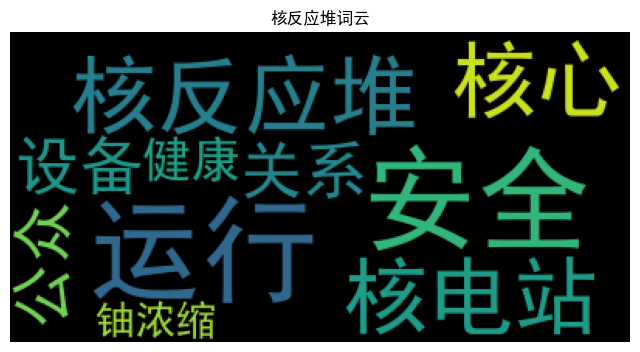

In [39]:
import wordcloud

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


text = ' '.join(filter_Word)

wc =WordCloud(font_path='simhei.ttf',
              repeat=False,
              max_words=10)

word_cloud = wc.generate(text)

plt.figure(figsize=(8, 6))
plt.title('核反应堆词云')
plt.imshow(word_cloud)
plt.axis('off')
plt.show()